# Code and Output

SYSTEM PARAMETERS
Mass (m):                    0.5 kg
Spring constant (k):         9.4 N/m
Damping coefficient (b):     0.005 N*s/m
Moment of inertia (I):       0.109959 kg*m²
Initial angle (θ₀):          0.45 rad
Length (l):                  0.6 m
Gravity (g):                 9.8 m/s²
Total stiffness (k_total):   12.340 N*m/rad

DIFFERENTIAL EQUATION:
0.109959·θ'' + 0.005·θ' + 12.340·θ = 0

SIMULATION PARAMETERS
Initial conditions: θ(0) = 0.450000 rad, θ'(0) = 0.0 rad/s
Time step: h = 0.01 s
Simulation time: Tf = 10.0 s
Number of time steps: 1000

NUMERICAL SOLUTIONS
Computing Forward Euler...
Computing Backward Euler...
Computing Runge-Kutta 4...

COMPUTING ANALYTICAL SOLUTION

ANALYTICAL SOLUTION PARAMETERS
Natural frequency (ω₀):      10.593559 rad/s
Damping ratio (ζ):           0.002146
Damped frequency (ω_d):      10.593534 rad/s
Decay rate (a = ζω₀):        0.022736 1/s
Time constant (τ = 1/a):     43.984 s
Period (T = 2π/ω_d):         0.593 s
Quality factor (Q = 1/(2ζ)): 233.0


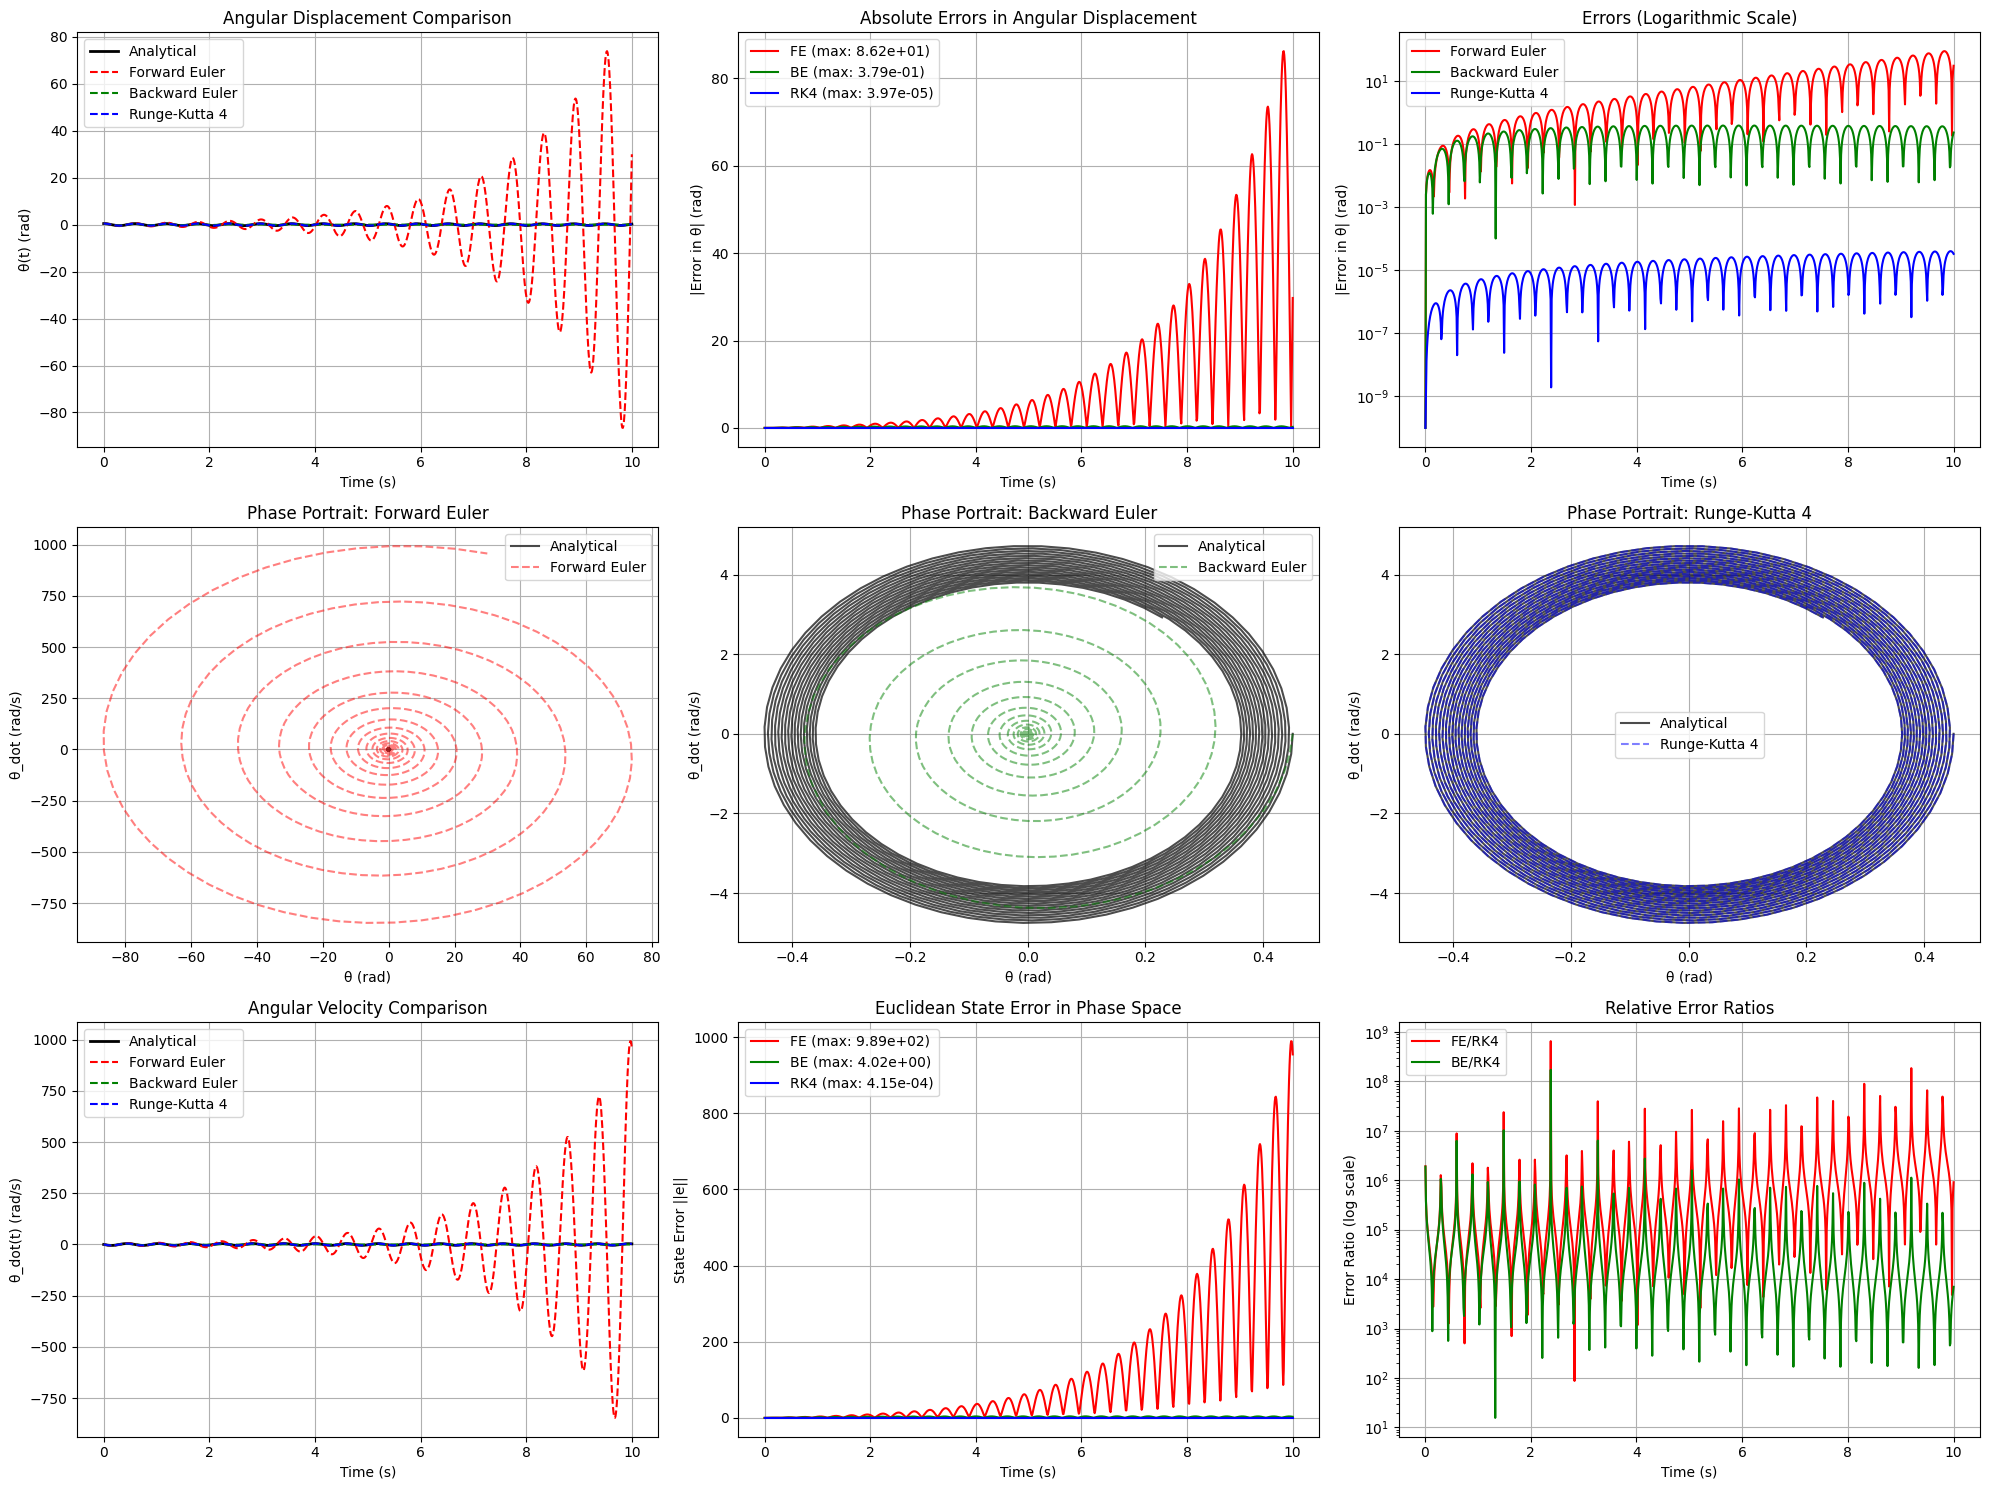

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================
# 1. PARAMETERS (from your data)
# ============================================
m = 0.5                    # kg
k = 9.4                    # N/m
b = 0.005                  # N*s/m
Im = 0.109959158           # kg*m² (moment of inertia)
theta_0 = 0.45             # rad
l = 0.6                    # m (assumed from original code)
g = 9.8                    # m/s²

# Calculate total stiffness
k_total = m * g * l + k    # N*m/rad

print("=" * 70)
print("SYSTEM PARAMETERS")
print("=" * 70)
print(f"Mass (m):                    {m} kg")
print(f"Spring constant (k):         {k} N/m")
print(f"Damping coefficient (b):     {b} N*s/m")
print(f"Moment of inertia (I):       {Im:.6f} kg*m²")
print(f"Initial angle (θ₀):          {theta_0} rad")
print(f"Length (l):                  {l} m")
print(f"Gravity (g):                 {g} m/s²")
print(f"Total stiffness (k_total):   {k_total:.3f} N*m/rad")

print(f"\nDIFFERENTIAL EQUATION:")
print(f"{Im:.6f}·θ'' + {b:.3f}·θ' + {k_total:.3f}·θ = 0")

# ============================================
# 2. SYSTEM DYNAMICS FUNCTION
# ============================================
def system_dynamics(x):
    """
    System dynamics for rotational mass-spring-damper
    x[0] = θ (angle)
    x[1] = θ_dot (angular velocity)
    """
    theta = x[0]
    theta_dot = x[1]
    theta_ddot = - (b/Im) * theta_dot - (k_total/Im) * theta
    return np.array([theta_dot, theta_ddot])

# ============================================
# 3. ANALYTICAL SOLUTION
# ============================================
def analytical_solution(t, x0):
    """
    Analytical solution for underdamped harmonic oscillator
    """
    omega0 = np.sqrt(k_total / Im)                    # Natural frequency
    zeta = b / (2 * np.sqrt(Im * k_total))           # Damping ratio
    omega_d = omega0 * np.sqrt(1 - zeta**2)          # Damped frequency
    
    theta0 = x0[0]
    theta_dot0 = x0[1]
    
    C1 = theta0
    C2 = (theta_dot0 + zeta * omega0 * theta0) / omega_d
    
    print(f"\n" + "=" * 70)
    print("ANALYTICAL SOLUTION PARAMETERS")
    print("=" * 70)
    print(f"Natural frequency (ω₀):      {omega0:.6f} rad/s")
    print(f"Damping ratio (ζ):           {zeta:.6f}")
    print(f"Damped frequency (ω_d):      {omega_d:.6f} rad/s")
    print(f"Decay rate (a = ζω₀):        {zeta*omega0:.6f} 1/s")
    print(f"Time constant (τ = 1/a):     {1/(zeta*omega0):.3f} s")
    print(f"Period (T = 2π/ω_d):         {2*np.pi/omega_d:.3f} s")
    print(f"Quality factor (Q = 1/(2ζ)): {1/(2*zeta):.1f}")
    
    print(f"\nANALYTICAL SOLUTION CONSTANTS:")
    print(f"C₁ = θ₀ = {C1:.6f} rad")
    print(f"C₂ = (θ₀' + ζω₀θ₀)/ω_d = {C2:.6f}")
    
    return np.exp(-zeta * omega0 * t) * (C1 * np.cos(omega_d * t) + C2 * np.sin(omega_d * t))

# ============================================
# 4. NUMERICAL METHODS
# ============================================
def forward_euler(fun, x0, Tf, h):
    """Explicit Euler method"""
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    for k in range(len(t) - 1):
        x_hist[:, k + 1] = x_hist[:, k] + h * fun(x_hist[:, k])
    return x_hist, t

def backward_euler(fun, x0, Tf, h, tol=1e-8, max_iter=100):
    """Implicit Euler method"""
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    for k in range(len(t) - 1):
        # Initial guess using explicit Euler
        x_hist[:, k + 1] = x_hist[:, k] + h * fun(x_hist[:, k])
        
        # Fixed-point iteration
        for i in range(max_iter):
            x_next = x_hist[:, k] + h * fun(x_hist[:, k + 1])
            error = np.linalg.norm(x_next - x_hist[:, k + 1])
            x_hist[:, k + 1] = x_next
            if error < tol:
                break
    return x_hist, t

def runge_kutta4(fun, x0, Tf, h):
    """Runge-Kutta 4th order method"""
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    for k in range(len(t) - 1):
        k1 = fun(x_hist[:, k])
        k2 = fun(x_hist[:, k] + 0.5 * h * k1)
        k3 = fun(x_hist[:, k] + 0.5 * h * k2)
        k4 = fun(x_hist[:, k] + h * k3)
        x_hist[:, k + 1] = x_hist[:, k] + (h / 6.0) * (k1 + 2*k2 + 2*k3 + k4)
    return x_hist, t

# ============================================
# 5. SIMULATION
# ============================================
x0 = np.array([theta_0, 0.0])  # Initial conditions: [angle, angular velocity]
Tf = 10.0                      # Final time (s)
h = 0.01                       # Time step (s)

print(f"\n" + "=" * 70)
print("SIMULATION PARAMETERS")
print("=" * 70)
print(f"Initial conditions: θ(0) = {x0[0]:.6f} rad, θ'(0) = {x0[1]:.1f} rad/s")
print(f"Time step: h = {h} s")
print(f"Simulation time: Tf = {Tf} s")
print(f"Number of time steps: {int(Tf/h)}")

# Numerical solutions
print(f"\n" + "=" * 70)
print("NUMERICAL SOLUTIONS")
print("=" * 70)
print("Computing Forward Euler...")
x_fe, t_fe = forward_euler(system_dynamics, x0, Tf, h)
print("Computing Backward Euler...")
x_be, t_be = backward_euler(system_dynamics, x0, Tf, h)
print("Computing Runge-Kutta 4...")
x_rk4, t_rk4 = runge_kutta4(system_dynamics, x0, Tf, h)

# Analytical solution
print(f"\n" + "=" * 70)
print("COMPUTING ANALYTICAL SOLUTION")
print("=" * 70)
theta_analytical = analytical_solution(t_fe, x0)

# ============================================
# 6. ERROR ANALYSIS
# ============================================
# Error in displacement (θ)
error_theta_fe = np.abs(x_fe[0, :] - theta_analytical)
error_theta_be = np.abs(x_be[0, :] - theta_analytical)
error_theta_rk4 = np.abs(x_rk4[0, :] - theta_analytical)

# Error in velocity (θ_dot)
# Need to compute analytical velocity
omega0 = np.sqrt(k_total / Im)
zeta = b / (2 * np.sqrt(Im * k_total))
omega_d = omega0 * np.sqrt(1 - zeta**2)
C1 = x0[0]
C2 = (x0[1] + zeta * omega0 * x0[0]) / omega_d

# Analytical velocity
theta_dot_analytical = np.exp(-zeta*omega0*t_fe) * (
    -zeta*omega0*C1*np.cos(omega_d*t_fe) + (-zeta*omega0*C2 - C1*omega_d)*np.sin(omega_d*t_fe)
    + (C2*omega_d)*np.cos(omega_d*t_fe)
)

error_velocity_fe = np.abs(x_fe[1, :] - theta_dot_analytical)
error_velocity_be = np.abs(x_be[1, :] - theta_dot_analytical)
error_velocity_rk4 = np.abs(x_rk4[1, :] - theta_dot_analytical)

# Combined state error (Euclidean norm in phase space)
state_error_fe = np.sqrt((x_fe[0,:] - theta_analytical)**2 + (x_fe[1,:] - theta_dot_analytical)**2)
state_error_be = np.sqrt((x_be[0,:] - theta_analytical)**2 + (x_be[1,:] - theta_dot_analytical)**2)
state_error_rk4 = np.sqrt((x_rk4[0,:] - theta_analytical)**2 + (x_rk4[1,:] - theta_dot_analytical)**2)

print(f"\n" + "=" * 70)
print("ERROR STATISTICS")
print("=" * 70)

print("\nMAXIMUM ABSOLUTE ERRORS:")
print("-" * 50)
print(f"Forward Euler - θ error:        {np.max(error_theta_fe):.4e} rad")
print(f"                  θ_dot error:   {np.max(error_velocity_fe):.4e} rad/s")
print(f"                  State error:   {np.max(state_error_fe):.4e}")
print(f"Backward Euler - θ error:       {np.max(error_theta_be):.4e} rad")
print(f"                  θ_dot error:   {np.max(error_velocity_be):.4e} rad/s")
print(f"                  State error:   {np.max(state_error_be):.4e}")
print(f"Runge-Kutta 4 - θ error:        {np.max(error_theta_rk4):.4e} rad")
print(f"                θ_dot error:     {np.max(error_velocity_rk4):.4e} rad/s")
print(f"                State error:     {np.max(state_error_rk4):.4e}")

print("\nROOT MEAN SQUARE (RMS) ERRORS:")
print("-" * 50)
print(f"Forward Euler - θ RMS:          {np.sqrt(np.mean(error_theta_fe**2)):.4e} rad")
print(f"Backward Euler - θ RMS:         {np.sqrt(np.mean(error_theta_be**2)):.4e} rad")
print(f"Runge-Kutta 4 - θ RMS:          {np.sqrt(np.mean(error_theta_rk4**2)):.4e} rad")

print("\nERROR AT FINAL TIME (t = 10 s):")
print("-" * 50)
print(f"Forward Euler - θ(10):          {error_theta_fe[-1]:.4e} rad")
print(f"Backward Euler - θ(10):         {error_theta_be[-1]:.4e} rad")
print(f"Runge-Kutta 4 - θ(10):          {error_theta_rk4[-1]:.4e} rad")

print("\nRELATIVE PERFORMANCE:")
print("-" * 50)
rk4_vs_fe = np.max(error_theta_fe) / np.max(error_theta_rk4)
rk4_vs_be = np.max(error_theta_be) / np.max(error_theta_rk4)
print(f"RK4 is {rk4_vs_fe:.0f} times more accurate than Forward Euler")
print(f"RK4 is {rk4_vs_be:.0f} times more accurate than Backward Euler")

# ============================================
# 7. PLOTTING
# ============================================
plt.figure(figsize=(20, 15))

# Plot 1: Displacement comparison
plt.subplot(3, 3, 1)
plt.plot(t_fe, theta_analytical, 'k-', linewidth=2, label='Analytical')
plt.plot(t_fe, x_fe[0, :], 'r--', label='Forward Euler')
plt.plot(t_be, x_be[0, :], 'g--', label='Backward Euler')
plt.plot(t_rk4, x_rk4[0, :], 'b--', label='Runge-Kutta 4')
plt.xlabel('Time (s)')
plt.ylabel('θ(t) (rad)')
plt.title('Angular Displacement Comparison')
plt.legend()
plt.grid(True)

# Plot 2: Displacement errors
plt.subplot(3, 3, 2)
plt.plot(t_fe, error_theta_fe, 'r-', label=f'FE (max: {np.max(error_theta_fe):.2e})')
plt.plot(t_be, error_theta_be, 'g-', label=f'BE (max: {np.max(error_theta_be):.2e})')
plt.plot(t_rk4, error_theta_rk4, 'b-', label=f'RK4 (max: {np.max(error_theta_rk4):.2e})')
plt.xlabel('Time (s)')
plt.ylabel('|Error in θ| (rad)')
plt.title('Absolute Errors in Angular Displacement')
plt.legend()
plt.grid(True)

# Plot 3: Log-scale errors
plt.subplot(3, 3, 3)
plt.semilogy(t_fe, error_theta_fe + 1e-10, 'r-', label='Forward Euler')
plt.semilogy(t_be, error_theta_be + 1e-10, 'g-', label='Backward Euler')
plt.semilogy(t_rk4, error_theta_rk4 + 1e-10, 'b-', label='Runge-Kutta 4')
plt.xlabel('Time (s)')
plt.ylabel('|Error in θ| (rad)')
plt.title('Errors (Logarithmic Scale)')
plt.legend()
plt.grid(True)

# Plot 4: Phase portraits
plt.subplot(3, 3, 4)
plt.plot(theta_analytical, theta_dot_analytical, 'k-', alpha=0.7, label='Analytical')
plt.plot(x_fe[0, :], x_fe[1, :], 'r--', alpha=0.5, label='Forward Euler')
plt.xlabel('θ (rad)')
plt.ylabel('θ_dot (rad/s)')
plt.title('Phase Portrait: Forward Euler')
plt.legend()
plt.grid(True)

plt.subplot(3, 3, 5)
plt.plot(theta_analytical, theta_dot_analytical, 'k-', alpha=0.7, label='Analytical')
plt.plot(x_be[0, :], x_be[1, :], 'g--', alpha=0.5, label='Backward Euler')
plt.xlabel('θ (rad)')
plt.ylabel('θ_dot (rad/s)')
plt.title('Phase Portrait: Backward Euler')
plt.legend()
plt.grid(True)

plt.subplot(3, 3, 6)
plt.plot(theta_analytical, theta_dot_analytical, 'k-', alpha=0.7, label='Analytical')
plt.plot(x_rk4[0, :], x_rk4[1, :], 'b--', alpha=0.5, label='Runge-Kutta 4')
plt.xlabel('θ (rad)')
plt.ylabel('θ_dot (rad/s)')
plt.title('Phase Portrait: Runge-Kutta 4')
plt.legend()
plt.grid(True)

# Plot 7: Velocity comparison
plt.subplot(3, 3, 7)
plt.plot(t_fe, theta_dot_analytical, 'k-', linewidth=2, label='Analytical')
plt.plot(t_fe, x_fe[1, :], 'r--', label='Forward Euler')
plt.plot(t_be, x_be[1, :], 'g--', label='Backward Euler')
plt.plot(t_rk4, x_rk4[1, :], 'b--', label='Runge-Kutta 4')
plt.xlabel('Time (s)')
plt.ylabel('θ_dot(t) (rad/s)')
plt.title('Angular Velocity Comparison')
plt.legend()
plt.grid(True)

# Plot 8: State errors
plt.subplot(3, 3, 8)
plt.plot(t_fe, state_error_fe, 'r-', label=f'FE (max: {np.max(state_error_fe):.2e})')
plt.plot(t_be, state_error_be, 'g-', label=f'BE (max: {np.max(state_error_be):.2e})')
plt.plot(t_rk4, state_error_rk4, 'b-', label=f'RK4 (max: {np.max(state_error_rk4):.2e})')
plt.xlabel('Time (s)')
plt.ylabel('State Error ||e||')
plt.title('Euclidean State Error in Phase Space')
plt.legend()
plt.grid(True)

# Plot 9: Error ratios
plt.subplot(3, 3, 9)
plt.semilogy(t_fe[1:], error_theta_fe[1:]/error_theta_rk4[1:], 'r-', label='FE/RK4')
plt.semilogy(t_be[1:], error_theta_be[1:]/error_theta_rk4[1:], 'g-', label='BE/RK4')
plt.xlabel('Time (s)')
plt.ylabel('Error Ratio (log scale)')
plt.title('Relative Error Ratios')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()